## Warm-up task with a single input variable and incremental learning ##

Authors: Laura Nilsson & Leo Svanemar
Date: 2023-05-22



In [ ]:
import pylab as pb
import numpy as np
import matplotlib . pyplot as plt
from math import pi
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist
# To draw n samples from multivariate Gaussian distribution with mu and Cov :
# f = np . random . multivariate_normal ( mu , Cov , n ) 

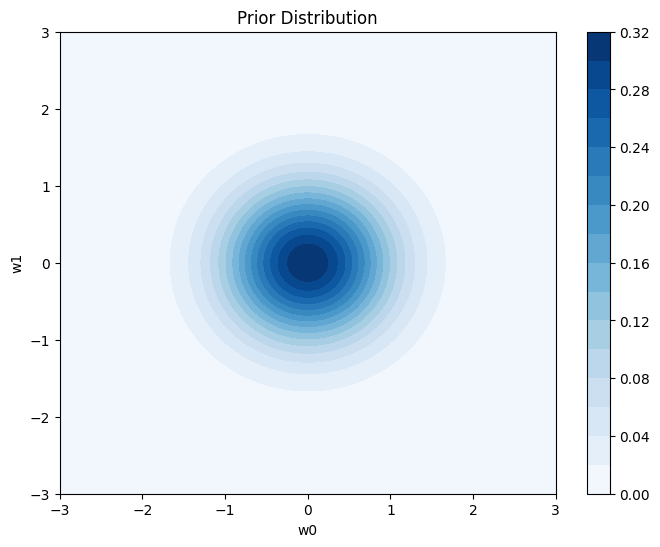

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
alpha = 2
mu = np.zeros(2)  # Mean vector
cov = (1/alpha) * np.eye(2)  # Covariance matrix

# Create a grid of w0 and w1 values
w0_vals = np.linspace(-3, 3, 100)
w1_vals = np.linspace(-3, 3, 100)
w0, w1 = np.meshgrid(w0_vals, w1_vals)
w_grid = np.stack((w0, w1), axis=2)

# Calculate the prior probability density for each combination of w0 and w1
prior = np.exp(-0.5 * np.sum((w_grid - mu) @ np.linalg.inv(cov) * (w_grid - mu), axis=2))
prior /= np.sqrt(np.linalg.det(2 * np.pi * cov))

# Create a contour plot of the prior distribution
plt.figure(figsize=(8, 6))
plt.contourf(w0, w1, prior, levels=20, cmap='Blues')
plt.colorbar()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Prior Distribution')
plt.show()